In [58]:
!pip install import-ipynb

# Yeni Bölüm

In [59]:
import import_ipynb
from preprocessing import load_data,clean_data, preprocessing,vectorize, split_data
from tensorflow.keras.optimizers import Adam

In [60]:
df = load_data("Phishing_Email.csv")
df = clean_data(df)
df['Email Text'] = df['Email Text'].apply(preprocessing)
tf,X,y = vectorize(df)

<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_len = 150

tk = Tokenizer(num_words=10000)

tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

X = np.array(vector)
y = np.array(df["Email Type"])

X_train, X_test, y_train, y_test = split_data(X,y)

In [65]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Model parametreleri
embedding_dim = 128


# GRU modelini oluşturalım
model = Sequential([
    Embedding(10000, embedding_dim, input_length=max_len),
    Bidirectional(GRU(16, return_sequences=True,kernel_regularizer=l2(0.01))),
    Dropout(0.4),
    Bidirectional(GRU(8,kernel_regularizer=l2(0.01))),
    Dropout(0.3),
    Dense(32, activation='relu',kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Modeli derleyelim
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1,
)
# Model özetini görelim
model.summary()


Epoch 1/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.6377 - loss: 1.8488 - val_accuracy: 0.9195 - val_loss: 0.4040
Epoch 2/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9450 - loss: 0.3243 - val_accuracy: 0.9302 - val_loss: 0.3002
Epoch 3/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9585 - loss: 0.2083 - val_accuracy: 0.9510 - val_loss: 0.1877
Epoch 4/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9731 - loss: 0.1248 - val_accuracy: 0.9504 - val_loss: 0.1646
Epoch 5/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9783 - loss: 0.1047 - val_accuracy: 0.9517 - val_loss: 0.1713
Epoch 6/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9821 - loss: 0.0818 - val_accuracy: 0.9577 - val_loss: 0.1406
Epoch 7/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9844 - loss: 0.0748 - val_accuracy: 0.9577 - val_loss: 0.1586
Epoch 8/30
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9834 - loss: 0.0640 - val_a

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_28 (Embedding)        │ (None, 150, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_60                │ (None, 150, 32)        │        14,016 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 150, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_61                │ (None, 16)             │         2,016 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,889,829 (14.84 MB)

 Trainable params: 1,296,609 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,593,220 (9.89 MB)

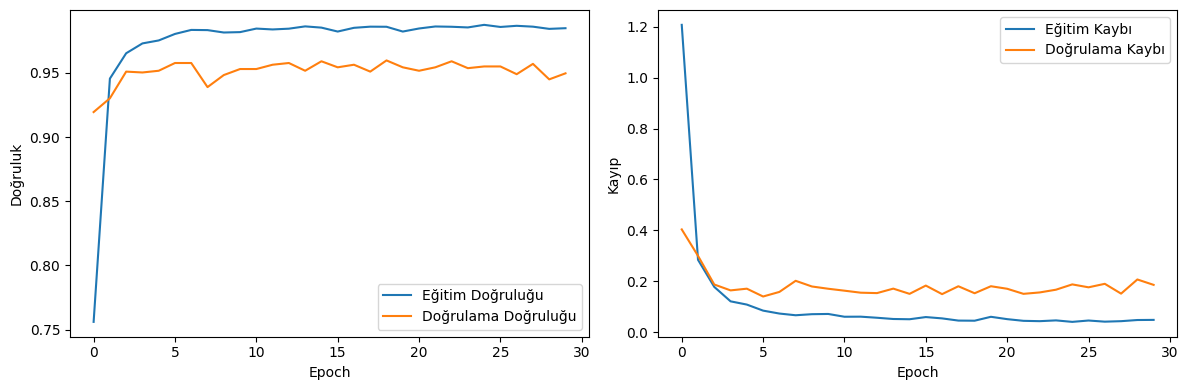

In [66]:
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test doğruluğu: {accuracy:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=['Normal Email', 'Phishing Email']))

print("\nKarmaşıklık Matrisi:")
print(confusion_matrix(y_test, y_pred))

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9653 - loss: 0.1413
Test doğruluğu: 0.9638
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Sınıflandırma Raporu:
                precision    recall  f1-score   support

  Normal Email       0.94      0.97      0.96      1518
Phishing Email       0.98      0.96      0.97      2209

      accuracy                           0.96      3727
     macro avg       0.96      0.97      0.96      3727
  weighted avg       0.96      0.96      0.96      3727


Karmaşıklık Matrisi:
[[1477   41]
 [  94 2115]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Phishing', 'Phishing'], yticklabels=['Not Phishing', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, target_names=['Not Phishing', 'Phishing']))